<a href="https://colab.research.google.com/github/slisovych/machine_learning_hometasks/blob/main/HW_2_3_%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D0%B0_%D0%BF%D1%80%D0%B8%D0%B9%D0%BD%D1%8F%D1%82%D1%82%D1%8F_%D1%80%D1%96%D1%88%D0%B5%D0%BD%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



**посилання на файл в репозиторії**:

https://github.com/slisovych/machine_learning_hometasks/blob/c63e15295876bae1a13ff0a17275ac284f35bbc5/process_bank_churn.py

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# import sys
# sys.path.append('/content/drive/My Drive/Colab Notebooks/ML_Hanna_Pylieva/hometasks/process_bank_churn.py')

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from process_bank_churn import preprocess_data

In [5]:
#?preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [3]:
!pip install opendatasets --upgrade --quiet

In [4]:
import opendatasets as od
od.download('https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu-course-c-2/data?select=train.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: svitlanalisovych
Your Kaggle Key: ··········


100%|██████████| 637k/637k [00:00<00:00, 67.5MB/s]


Extracting archive ./bank-customer-churn-prediction-dlu-course-c-2/bank-customer-churn-prediction-dlu-course-c-2.zip to ./bank-customer-churn-prediction-dlu-course-c-2


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_auc_score, accuracy_score
from typing import Tuple, List, Dict, Any

raw_df = pd.read_csv('./bank-customer-churn-prediction-dlu-course-c-2/train.csv')
raw_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [6]:
preprocess_data(raw_df)


{'train_X':        CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
 7180      0.320187 -0.944682 -1.447264  1.475464      -1.108193   0.515062   
 10393     0.347838  0.161227 -1.087792  2.254434      -1.108193   0.515062   
 80        0.638166 -0.330288  0.350096  1.223831       0.769304   0.515062   
 3365      0.140460  2.495924 -1.806736 -0.717950       0.769304  -1.941514   
 12236     0.665816 -2.050591 -0.728320 -0.717950       0.769304   0.515062   
 ...            ...       ...       ...       ...            ...        ...   
 9493     -0.357246 -0.576046 -0.368848 -0.717950       0.769304  -1.941514   
 8463      0.195761  0.284106 -1.447264 -0.717950      -1.108193   0.515062   
 8143     -0.523147 -1.067561  1.069040 -0.717950       0.769304   0.515062   
 11512    -0.951727  0.529864  0.709568 -0.717950       0.769304  -1.941514   
 9360     -1.573860 -1.313318 -1.087792 -0.717950       0.769304   0.515062   
 
        IsActiveMember  EstimatedSalary

In [7]:
data = preprocess_data(raw_df, scale_numeric=True)  # Використовуємо False для дерева рішень

train_X, train_y = data['train_X'], data['train_y']
val_X, val_y = data['val_X'], data['val_y']
input_cols = data['input_cols']
scaler = data['scaler']
encoder = data['encoder']

print("Вхідні колонки:", input_cols)

Вхідні колонки: ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [8]:
# Навчання моделі дерева прийняття рішень
model = DecisionTreeClassifier(random_state=42)
model.fit(train_X, train_y)

# Оцінка моделі за AUC ROC
train_preds_proba = model.predict_proba(train_X)[:, 1]
val_preds_proba = model.predict_proba(val_X)[:, 1]
train_auc = roc_auc_score(train_y, train_preds_proba)
val_auc = roc_auc_score(val_y, val_preds_proba)
print(f"Train ROC-AUC: {train_auc:.4f}, Validation ROC-AUC: {val_auc:.4f}")

Train ROC-AUC: 1.0000, Validation ROC-AUC: 0.7702


**Висновок: модель перенавчилася**

In [9]:
#перевіримо глибину створеного дерева.
model.tree_.max_depth

26

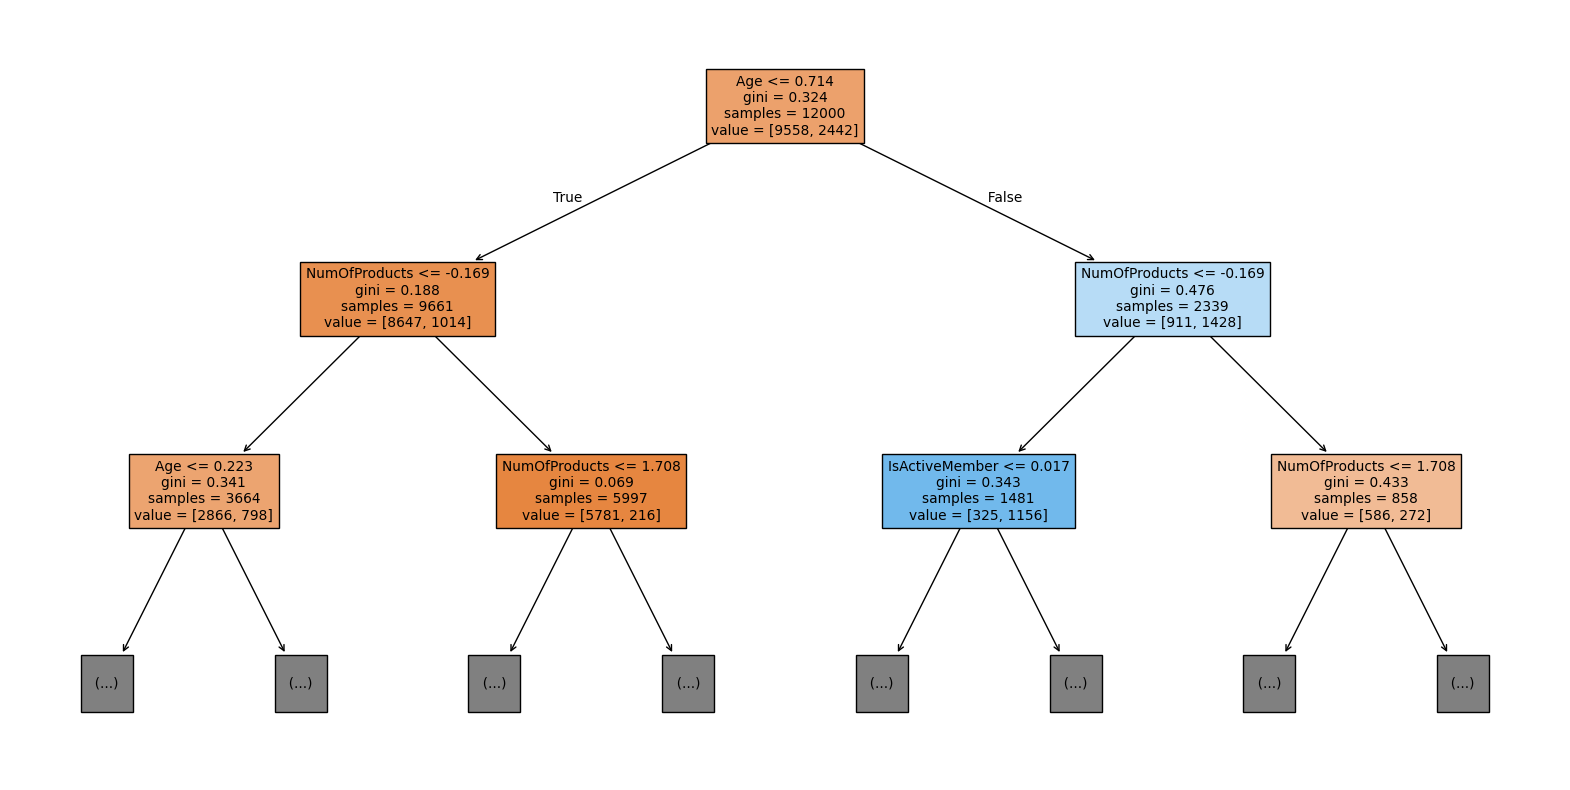

,Feature,Importance
1,Age,0.356789
4,NumOfProducts,0.168379
7,EstimatedSalary,0.123635
0,CreditScore,0.123283
3,Balance,0.079192
2,Tenure,0.052899
6,IsActiveMember,0.032688
11,Gender_Female,0.014908
9,Geography_Germany,0.014725
5,HasCrCard,0.012957


In [10]:
# Візуалізація дерева рішень до глибини 2
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=train_X.columns, max_depth=2, filled=True)
plt.show()

# Аналіз важливості ознак
feature_importance = pd.DataFrame({
    'Feature': train_X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Виведення топ-10 найважливіших ознак
feature_importance.head(10)


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [11]:
# Навчання моделі дерева прийняття рішень
model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=50, random_state=42)
model.fit(train_X, train_y)

# Оцінка моделі за AUC ROC
train_preds_proba = model.predict_proba(train_X)[:, 1]
val_preds_proba = model.predict_proba(val_X)[:, 1]
train_auc = roc_auc_score(train_y, train_preds_proba)
val_auc = roc_auc_score(val_y, val_preds_proba)
print(f"Train ROC-AUC: {train_auc:.4f}, Validation ROC-AUC: {val_auc:.4f}")

Train ROC-AUC: 0.9257, Validation ROC-AUC: 0.9219


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

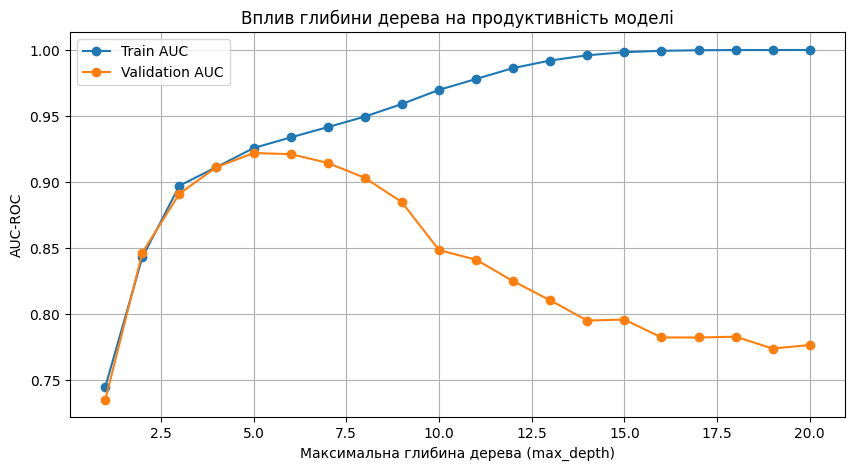

In [12]:
# Діапазон значень max_depth для перевірки
depth_range = range(1, 21)

# Списки для збереження результатів
train_auc_scores = []
val_auc_scores = []

# Цикл для перевірки різних значень max_depth
for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(train_X, train_y)

    # Передбачення ймовірностей
    train_preds_proba = model.predict_proba(train_X)[:, 1]
    val_preds_proba = model.predict_proba(val_X)[:, 1]

    # Обчислення AUC-ROC
    train_auc = roc_auc_score(train_y, train_preds_proba)
    val_auc = roc_auc_score(val_y, val_preds_proba)

    train_auc_scores.append(train_auc)
    val_auc_scores.append(val_auc)

# Побудова графіка залежності AUC від max_depth
plt.figure(figsize=(10, 5))
plt.plot(depth_range, train_auc_scores, marker='o', label='Train AUC')
plt.plot(depth_range, val_auc_scores, marker='o', label='Validation AUC')
plt.xlabel("Максимальна глибина дерева (max_depth)")
plt.ylabel("AUC-ROC")
plt.title("Вплив глибини дерева на продуктивність моделі")
plt.legend()
plt.grid()
plt.show()


**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [13]:
from process_bank_churn import preprocess_new_data

# Завантаження тестових даних
test_df = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/test.csv', index_col=0)

# Попередня обробка тестових даних
test_X = preprocess_new_data(
    new_data=test_df,
    input_cols=input_cols,  # Використовуємо ті самі колонки, що й у тренуванні
    scaler=scaler,
    encoder=encoder,
    scale_numeric=True  # В залежності від вибору масштабування
)

# Передбачення на тестових даних
test_preds = model.predict(test_X)

# Додавання передбачень до тестового датасету
test_df['Exited'] = test_preds

# Перегляд перших передбачених значень
print(test_df['Exited'].head())


id
15000    0.0
15001    0.0
15002    0.0
15003    0.0
15004    0.0
Name: Exited, dtype: float64


In [15]:
submission_log_reg = pd.read_csv('bank-customer-churn-prediction-dlu-course-c-2/sample_submission.csv', index_col=0)

submission_log_reg['Exited'] = test_df['Exited'].values
submission_log_reg.to_csv('submission_log_reg.csv')

In [16]:
# Оновлена модель з гнучкішими параметрами
model = DecisionTreeClassifier(
    max_depth=6,
    max_leaf_nodes=30,
    min_samples_leaf=15,
    ccp_alpha=0.0001,
    class_weight="balanced",
    random_state=42
)
model.fit(data['train_X'], data['train_y'])

# Оцінка продуктивності
train_preds_proba = model.predict_proba(data['train_X'])[:, 1]
val_preds_proba = model.predict_proba(data['val_X'])[:, 1]

print(f"Train ROC-AUC: {roc_auc_score(data['train_y'], train_preds_proba):.4f}")
print(f"Validation ROC-AUC: {roc_auc_score(data['val_y'], val_preds_proba):.4f}")

# Додаємо відсутні ознаки у test_X
for col in data['train_X'].columns:
    if col not in test_X.columns:
        test_X[col] = 0

# Впорядковуємо колонки
test_X = test_X[data['train_X'].columns]

# Передбачення на тестовому наборі
test_preds_proba = model.predict_proba(test_X)[:, 1]

print("Test predict_proba min:", test_preds_proba.min())
print("Test predict_proba max:", test_preds_proba.max())
print("Test predict_proba mean:", test_preds_proba.mean())


Train ROC-AUC: 0.9287
Validation ROC-AUC: 0.9225
Test predict_proba min: 0.0
Test predict_proba max: 0.9983543720332199
Test predict_proba mean: 0.3308036386683176
